<a href="https://colab.research.google.com/github/carvalheirafc/probabilidade_repository/blob/master/prova2/Carlos_Frederico_Carvalheira_Mello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidade 01 - Avaliação 01

- **Aluno**: Carlos Frederico Carvalheira Mello
- **Matrícula**: --20150103172


**Avisos**

1. O conceito desta avaliação corresponde a **100% da segunda unidade**. Os assuntos aqui abordados fazem menção as aulas 13 a 19.
2. O notebook deverá ser renomeado para o nome completo do aluno seguindo o formato: Ivanovitch_Medeiros_Dantas_da_Silva.ipynb
3. Todas as questões devem ser respondidas através de códigos escritos em linguagem Python 3 (**verificar o tipo do runtime**) e no espaço destinado para esse fim. Criem células Markdown para destacar quando inicia e termina as questões. 
4. O notebook resultante deverá ser enviado através do Sigaa conforme tarefa cadastrada pelo professor. Ressalta-se que após o horário de final da aula, a submissão da tarefa estará fechada no Sigaa. 
5. O arquivo da base de dados não deve ser alterado. 

# Base de Dados



In [1]:
# instalar a biblioteca necessária para ler arquivos xlsx
!pip install xlrd

    100% |████████████████████████████████| 112kB 4.2MB/s 


In [2]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving FMC_I.xlsx to FMC_I.xlsx
User uploaded file "FMC_I.xlsx" with length 14905 bytes


In [3]:
# Import pandas
import pandas as pd

# source
arquivo = 'FMC_I.xlsx'

# create a dataframe from a excel file
excel = pd.ExcelFile('FMC_I.xlsx')

# print sheet names
print(excel.sheet_names)

# Dataframes
T34 = excel.parse(0)
N12 = excel.parse(1)
M56 = excel.parse(2)

['FMC_I_246T34.csv', 'FMC_I_246N12', 'FMC_I_246M56']


In [4]:
#T34.head()
#N12.head()
M56.head()

,Reposição,Média,Faltas,Estado,Id_Aluno
0,f,0.9,26,CANCELADO,47468b6c854c7a206bf7f733f3727ce7
1,f,0.0,88,CANCELADO,861432887ffbefe3e610b1672b117105
2,f,0.0,76,CANCELADO,690d729f227fbc71ea122a5fce7ec007
3,f,0.0,84,CANCELADO,ff0f4b0ea6289ddd59bbb6d78fd55e3f
4,f,0.0,78,CANCELADO,af500eb6a30f91701916ecf9ef566198


**1. (2,5 pontos) - Análise exploratória dos dados a partir de gráficos de barra.**
  - Crie gráficos de barras contendo a proporção de alunos que fizeram ou não a prova de reposição para as turmas de FMC I nos turnos matutino, vespertino e noturno. 
  - Configure títulos dos gráficos em consonância com os nomes das disciplinas.
  - Limite o eixo Y para valores entre 0 e 1.
  - Utilize a função subplot() para criar os gráficos em uma topologia de 1 linha e 3 colunas.
  - Utilize a função plot() embarcada no próprio Dataframe do Pandas. 
  - Escreva com suas palavras a interpretação dos resultados obtidos comparando as três turmas. 
  - Dica: aula 16.

In [0]:
t34_proportion = len(T34[T34['Reposição'] == 't']) / len(T34['Reposição'])


**2. (2,5 pontos) Análise exploratória a partir de gráficos de barras**.

- Utilizando gráficos de barras, compare e interprete os resultados encontrados na coluna "Estado" das disciplinas de FMC I. Escreva suas conclusões.

In [0]:
import matplotlib.pyplot as plt




plt.bar(T34['Estado'], T34['Estado'].value_counts())

**3. (2,5 pontos) Visualização exploratória de dados a partir de gráficos boxplot**
  
  - Utilize a coluna "Média" de cada disciplina para as interpretações e geração de resultados.
  - A partir dos gráficos de boxplot qual a disciplina teve pior resultado. Explique suas conclusões. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,0,'Manhã 56')

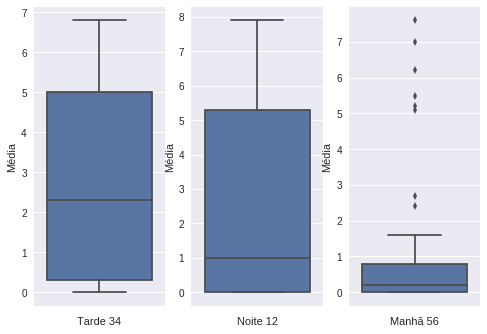

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 3)


t34_box = sns.boxplot(data=T34, x='Média', orient='v', ax=ax[0])
n12_box = sns.boxplot(data=N12, x='Média', orient='v', ax=ax[1])
m56_box = sns.boxplot(data=M56, x='Média', orient='v', ax=ax[2])

t34_box.set_xlabel('Tarde 34')
n12_box.set_xlabel('Noite 12')
m56_box.set_xlabel('Manhã 56')



'A distribuição das notas da turma ficaram nos dois primeiros casos entre os valores 0 e 5.'
'A turma da manhã ficou com grande parte das notas nos valores entre 0 e 2.'

**4. (2,5 pontos) Visualização exploratória de dados a partir da biblioteca Seaborn.**
 
 - Utilize as funções do Seaborn, FacetGrid e map, para interpretar o comportamento das médias e realização de provas de reposição para todas as turmas de FMC I.
 - Escreva suas conclusões.
  

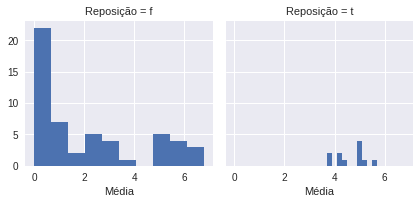

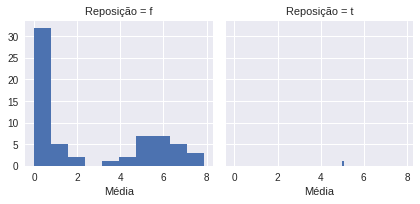

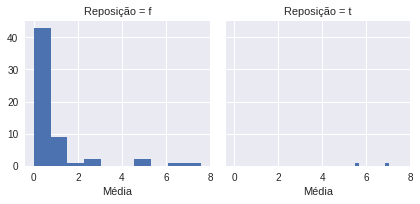

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt



t34_facet = sns.FacetGrid(data=T34, col='Reposição')
t34_facet = t34_facet.map(plt.hist, 'Média')

n12_facet = sns.FacetGrid(data=N12, col='Reposição')
n12_facet = n12_facet.map(plt.hist, 'Média')

m56_facet = sns.FacetGrid(data=M56, col='Reposição')
m56_facet = m56_facet.map(plt.hist, 'Média')

'Podemos observar que grande parte dos alunos ficaram com notas a baixo de 3.'
'Entre 5 e 10 alunos apenas ficam entre notas 5 e 7 e 5/8 em alguns casos.'
'E os poucos que foram para reposição conseguiram ficar com a nota a cima da média 5. Exceto no primeiro caso'


** 5. (2,0 pontos extras) Análise de amonstragem**

- Combine todas as disciplinas de FMC I em apenas um dataframe.
- Calcule a média histórica das notas. 
- Faça uma análise baseada em um gráfico de frequência sobre os diferentes estados dos alunos (aprovado, reprovado, etc)
- Compare uma análise de amostragem através da média da população e da amostra considerando 200 simulações e tamanhos de amostragem de 10, 20, 30, 40, 50, 100, 150. 
- A questão apenas será considerada caso todos os itens tenham sido feitos. 

In [5]:
frames = [T34, N12, M56]

fmc1 = pd.concat(frames)
fmc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 60
Data columns (total 5 columns):
Reposição    190 non-null object
Média        190 non-null float64
Faltas       190 non-null int64
Estado       190 non-null object
Id_Aluno     190 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 8.9+ KB


'E grande parte dos alunos ficaram com uma nota bem a baixo da média 3.'

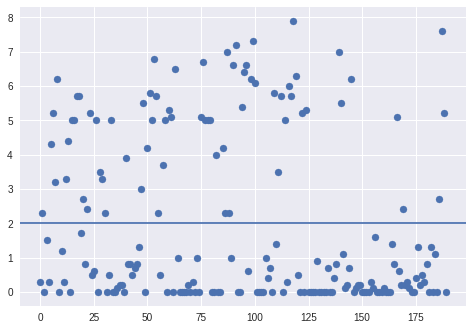

In [6]:
# Média e distribuição das notas de todos os alunos
import matplotlib.pyplot as plt

plt.scatter(range(0, 190), fmc1['Média'])
plt.axhline(fmc1['Média'].mean())

'Pelo scatter podemos ver que nenhum aluno obteve média igual a 8.'
'Uma parte considerável ficou entre as notas 7 e a média das notas.'
'E grande parte dos alunos ficaram com uma nota bem a baixo da média 3.'

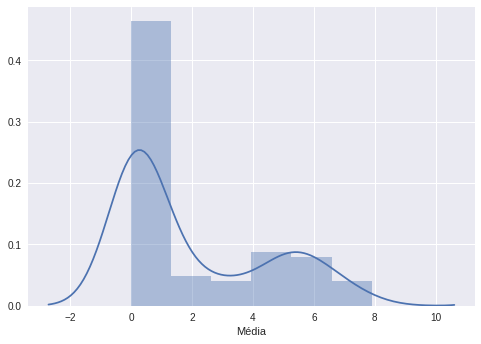

In [14]:
import seaborn as sns

sns.distplot(fmc1['Média'])



In [0]:
import seaborn as sns

mean_10 = []
mean_20 = []
mean_150 = []

for it in range(0, 199):
  mean_10.append(fmc1['Média'].sample(n=10, random_state = it).mean()) 
  mean_20.append(fmc1['Média'].sample(n=20, random_state = it).mean()) 
  mean_150.append(fmc1['Média'].sample(n=150, random_state = it).mean()) 
  
 
  
  


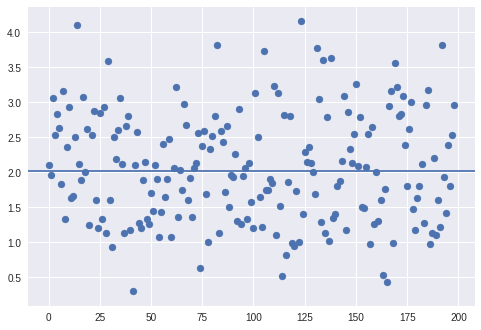

In [0]:
plt.scatter(range(0, 199), mean_10)
plt.axhline(fmc1['Média'].mean())
plt.show()

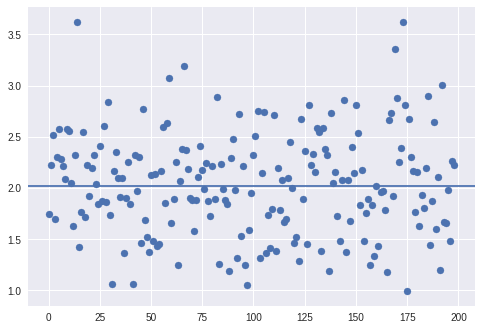

In [0]:
plt.scatter(range(0,199), mean_20)
plt.axhline(fmc1['Média'].mean())
plt.show()

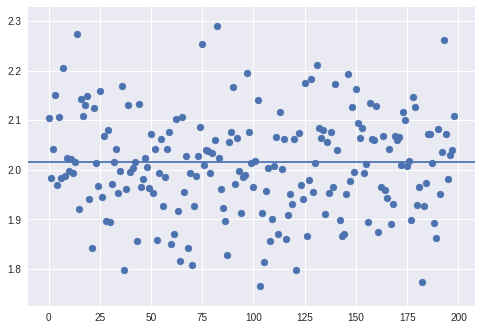

In [0]:
plt.scatter(range(0,199), mean_150)
plt.axhline(fmc1['Média'].mean())
plt.show()